In [2]:
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [3]:
from google.colab import drive # gdrive 연동
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 100만개 데이터

In [4]:
# Disease 

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_dis_vs_nor.csv', encoding='cp949') # upsampling 안된 것!
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,0,1,116,78,94,16.6,0
1,0,1,100,60,79,22.3,0
2,0,1,100,60,87,21.9,0
3,0,1,111,70,72,20.2,0
4,0,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
999995,1,27,120,70,81,23.1,1
999996,1,27,110,70,104,27.2,1
999997,1,27,115,53,110,25.2,1
999998,1,27,120,70,90,19.7,1


In [5]:
df.notnull().sum()

SEX      1000000
BTH_G    1000000
SBP      1000000
DBP      1000000
FBS      1000000
BMI      1000000
Dis      1000000
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   BMI     1000000 non-null  float64
 6   Dis     1000000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


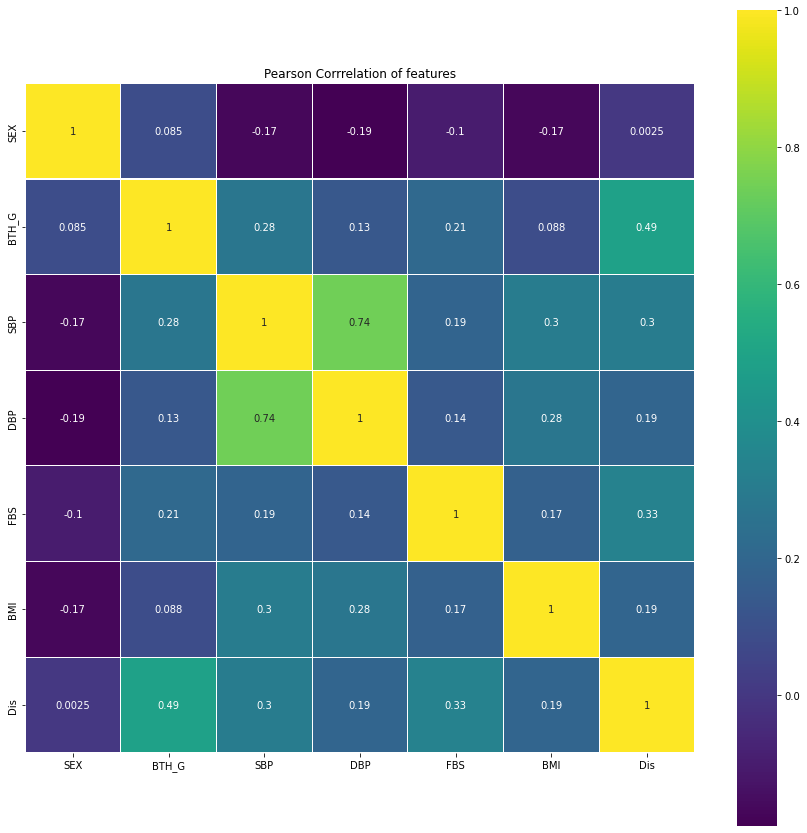

In [7]:
colormap = plt.cm.viridis # pearson 상관 계수 확인 ---> heatmap
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white')

In [8]:
# feature와 target 분리(설명변수 및 목표변수 분리)
x = df.drop(['Dis'], axis=1) # df[df.columns.difference(['target'])]
y = np.array(df['Dis']) # y = df['target']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 42) # 기본 0.25

# # 표준 스케일러(평균 0, 분산 1)
# scaler = StandardScaler()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750000, 6)
(750000,)
(250000, 6)
(250000,)


In [9]:
x_train.shape

(750000, 6)

In [10]:
x_test.shape

(250000, 6)

In [11]:
y_train.shape

(750000,)

In [12]:
y_test.shape

(250000,)

**Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀


LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(x_train,y_train)

print("train score : {}".format(LR.score(x_train, y_train)))

predict_y = LR.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, LR.predict(x_test)))
print("test score : {}".format(LR.score(x_test, y_test)))

train score : 0.8179706666666666
              precision    recall  f1-score   support

           0       0.85      0.92      0.88    184997
           1       0.69      0.54      0.61     65003

    accuracy                           0.82    250000
   macro avg       0.77      0.73      0.74    250000
weighted avg       0.81      0.82      0.81    250000

test score : 0.817968


## Upsampling 데이터

In [14]:
# Disease 

df2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_over_sampling.csv', encoding='cp949') # upsampling 안된 것!
df2

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,1,1,116,78,94,16.6,0
1,1,1,100,60,79,22.3,0
2,1,1,100,60,87,21.9,0
3,1,1,111,70,72,20.2,0
4,1,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
1481319,0,25,120,80,78,27.9,1
1481320,0,27,150,74,133,32.0,1
1481321,1,25,120,70,118,26.9,1
1481322,0,20,136,68,93,21.5,1


In [15]:
df2.notnull().sum()

SEX      1481324
BTH_G    1481324
SBP      1481324
DBP      1481324
FBS      1481324
BMI      1481324
Dis      1481324
dtype: int64

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481324 entries, 0 to 1481323
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1481324 non-null  int64  
 1   BTH_G   1481324 non-null  int64  
 2   SBP     1481324 non-null  int64  
 3   DBP     1481324 non-null  int64  
 4   FBS     1481324 non-null  int64  
 5   BMI     1481324 non-null  float64
 6   Dis     1481324 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 79.1 MB


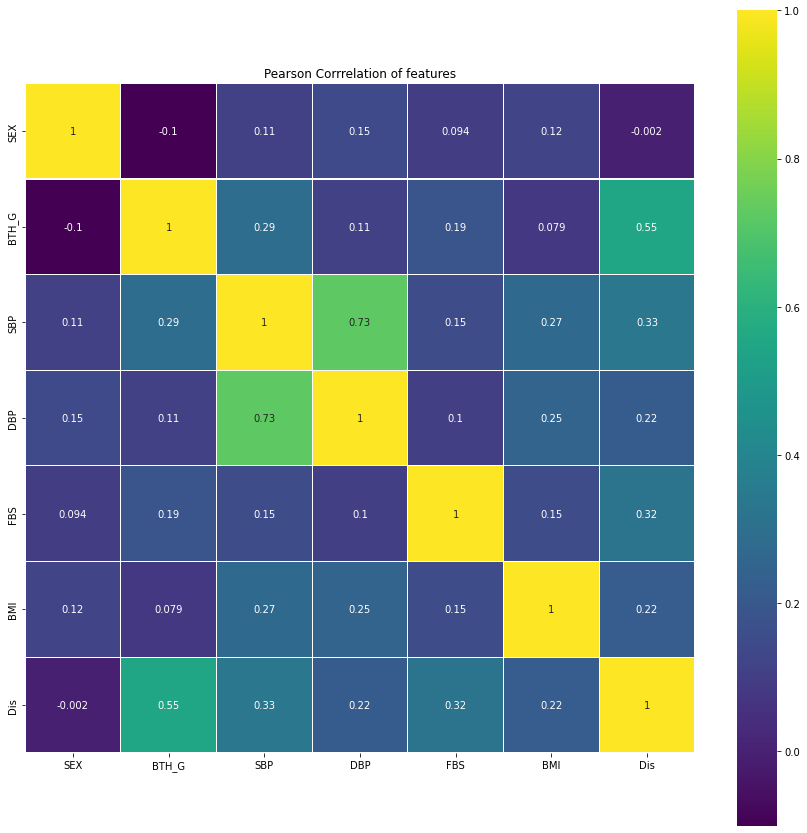

In [17]:
colormap = plt.cm.viridis # pearson 상관 계수 확인 ---> heatmap
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(df2.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white')

In [53]:
# Upsampling한 데이터로 train, test 나누기

# feature와 target 분리(설명변수 및 목표변수 분리)

x = df2.drop(['Dis'], axis=1) # df[df.columns.difference(['target'])]
y = np.array(df2['Dis']) # y = df['target']


x_up_train,x_up_test,y_up_train,y_up_test=train_test_split(x,y,test_size=0.25, random_state = 42) # 기본 0.25

# # 표준 스케일러(평균 0, 분산 1)
# scaler = StandardScaler()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_up_train = sc.fit_transform(x_up_train)
x_up_test = sc.transform(x_up_test)



print(x_up_train.shape)
print(y_up_train.shape)
print(x_up_test.shape)
print(y_up_test.shape)

(1110993, 6)
(1110993,)
(370331, 6)
(370331,)


In [19]:
|from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(x_up_train,y_up_train)

print("train score : {}".format(LR.score(x_up_train, y_up_train)))

predict_y = LR.predict(x_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, LR.predict(x_up_test)))
print("test score : {}".format(LR.score(x_up_test, y_up_test)))

train score : 0.7901327911156956
              precision    recall  f1-score   support

           0       0.79      0.78      0.79    184754
           1       0.78      0.80      0.79    185577

    accuracy                           0.79    370331
   macro avg       0.79      0.79      0.79    370331
weighted avg       0.79      0.79      0.79    370331

test score : 0.7885648244408381


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

하이퍼 파라미터 튜닝

In [20]:
# 참조 해야할 값들

# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)

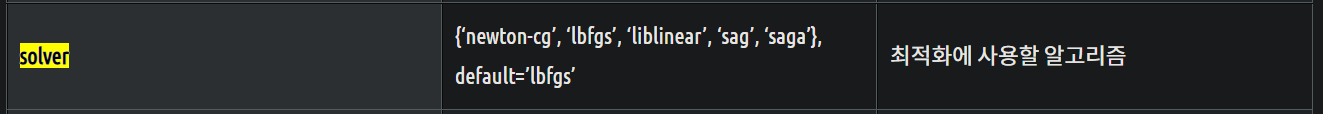

In [21]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(x_up_train, y_up_train)
    lr_preds = lr_clf.predict(x_up_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_up_test, lr_preds),
                                                                  roc_auc_score(y_up_test , lr_preds)))

solver:lbfgs, accuracy: 0.789, roc_auc:0.789
solver:liblinear, accuracy: 0.789, roc_auc:0.789
solver:newton-cg, accuracy: 0.789, roc_auc:0.789
solver:sag, accuracy: 0.789, roc_auc:0.789
solver:saga, accuracy: 0.789, roc_auc:0.789


solver 에서의 값들은 전부 동일하게 나왔다. 

Liblinear, saga의 경우 L1, L2 규제가 모두 가능하지만 Ibfgs, newton-cg, sag의 경우 L2 규제만 가능.

In [22]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]} # C값은 규제 강도를 조절하는 alpha값의 역수이다. C값이 작을수록 규제 강도가 크다.

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(x_up_train, y_up_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

최적 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 정확도:0.790


최적 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 정확도:0.790


**최적 Hyperparameter 나옴**

In [23]:
# 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

# params = {'C' : 0.01,
#          'penalty' : 'L1', 
#          'solver' : 'liblinear' }


early_stopping_rounds 파라미터 : 조기 중단을 위한 라운드를 설정합니다. 조기 중단 기능 수행을 위해서는 반드시 eval_set과 eval_metric이 함께 설정되어야 한다.

eval_set : 성능평가를 위한 평가용 데이터 세트를 설정 eval_metric : 평가 세트에 적용할 성능 평가 방법 (반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정) train() 함수를 호출하면 xgboost가 반복 시마다 evals에 표시된 데이터 세트에 대해 평가 지표를 출력한다. 그 후 학습이 완료된 모델 객체를 반환한다.

In [24]:
# 평가지표 출력하는 함수 설정
def get_clf_eval(y_up_test, y_up_pred):
    confusion = confusion_matrix(y_up_test, y_up_pred)
    accuracy = accuracy_score(y_up_test, y_up_pred)
    precision = precision_score(y_up_test, y_up_pred)
    recall = recall_score(y_up_test, y_up_pred)
    F1 = f1_score(y_up_test, y_up_pred)
    AUC = roc_auc_score(y_up_test, y_up_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [25]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_up_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_up_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

params = {'C' : 0.01,
         'penalty' : 'L1', 
         'solver' : 'liblinear' }

In [26]:
# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
x = df2.drop(['Dis'], axis=1) # df[df.columns.difference(['target'])]
y = np.array(df2['Dis']) # y = df['target']

# 데이터를 훈련과 테스트 데이터 셋으로 분리
x_up_train, x_up_test, y_up_train, y_up_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행 (그리드 서치로 찾은 최적의 하이퍼 파라미터로 진행)
lr_clf = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear')

lr_clf.fit(x_up_train, y_up_train)
pred = lr_clf.predict(x_up_test)
get_clf_eval(y_up_test, pred)

오차행렬:
 [[115345  32788]
 [ 29712 118420]]

정확도: 0.7890
정밀도: 0.7832
재현율: 0.7994
F1: 0.7912
AUC: 0.7890


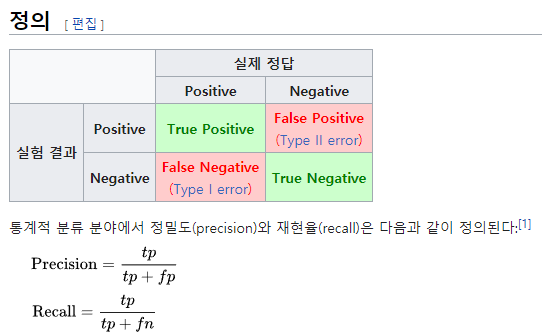

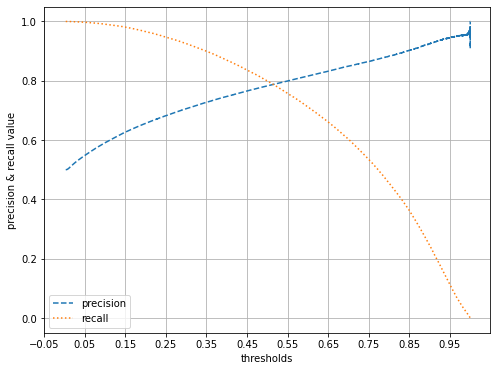

In [27]:
# 임계값별로 정밀도-재현율 출력
pred_proba = lr_clf.predict_proba(x_up_test)[:, 1]
precision_recall_curve_plot(y_up_test, pred_proba)

ROC 곡선 

X축인 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구하는 것

In [30]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_up_test, predict_y)
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값:  [1]
샘플 임곗값별 FPR:  [0.222]
샘플 임곗값별 TPR:  [0.799]


In [31]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(x_up_test)[:, 1]
roc_score = roc_auc_score(y_up_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


ROC AUC 값: 0.8502


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


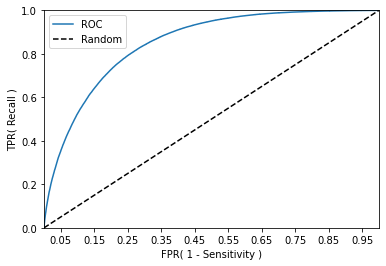

In [33]:
def roc_curve_plot(y_up_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_up_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_up_test, lr_clf.predict_proba(x_up_test)[:, 1] )

In [34]:
def get_clf_eval(y_up_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_up_test, pred)
    accuracy = accuracy_score(y_up_test , pred)
    precision = precision_score(y_up_test , pred)
    recall = recall_score(y_up_test , pred)
    f1 = f1_score(y_up_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_up_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

모델 합치기 위한 pkl 파일 생성

In [35]:
import joblib # joblib import

# 학습시킨 모델을 현재 경로에 knn_model.pkl 파일로 저장합니다.
joblib.dump(lr_clf,'./LR_model.pkl')

['./LR_model.pkl']

In [36]:
# 저장된 모델 출력

loaded_model = joblib.load('./LR_model.pkl')

score = loaded_model.score(x_up_test,y_up_test)
print('정확도: {score:.3f}'.format(score=score))

정확도: 0.499


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


다운로드 받음 ----> Gdrive에 업로드함

# SGDclassifier

**전체 Upsampling Data**

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_up_train, y_up_train)

print("train score : {}".format(sgd_clf.score(x_up_train, y_up_train)))

predict_y = sgd_clf.predict(x_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, sgd_clf.predict(x_up_test)))
print("test score : {}".format(sgd_clf.score(x_up_test, y_up_test)))

train score : 0.7906269436441093
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    184754
           1       0.78      0.81      0.79    185577

    accuracy                           0.79    370331
   macro avg       0.79      0.79      0.79    370331
weighted avg       0.79      0.79      0.79    370331

test score : 0.7889941700802795


In [38]:
print(confusion_matrix(y_up_test, predict_y))

[[141159  43595]
 [ 34547 151030]]


# sgd 하이퍼 파라미터 튜닝

In [ ]:
# SGDClassifier(alpha=0.0001, average=False, class_weight=None,
#               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
#               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
#               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
#               power_t=0.5, random_state=0, shuffle=True, tol=0.001,
#               validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

sgd_clf = SGDClassifier(max_iter=5000, tol=1e-5)  # max_iter : 최대반복수 (default값 : 1000, Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit. 에러로 값 높임  ),   tol : max_iter에 도달하지 않더라도 작업 중단

grid_clf = GridSearchCV(sgd_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(x_up_train, y_up_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}, 최적 평균 정확도:0.791


In [40]:
# 평가지표 출력하는 함수 설정
def get_clf_eval(y_up_test, y_up_pred):
    confusion = confusion_matrix(y_up_test, y_up_pred)
    accuracy = accuracy_score(y_up_test, y_up_pred)
    precision = precision_score(y_up_test, y_up_pred)
    recall = recall_score(y_up_test, y_up_pred)
    F1 = f1_score(y_up_test, y_up_pred)
    AUC = roc_auc_score(y_up_test, y_up_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [41]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_up_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_up_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [49]:
# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
x = df2.drop(['Dis'], axis=1) # df[df.columns.difference(['target'])]
y = np.array(df2['Dis']) # y = df['target']

# 데이터를 훈련과 테스트 데이터 셋으로 분리
x_up_train, x_up_test, y_up_train, y_up_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행 (그리드 서치로 찾은 최적의 하이퍼 파라미터로 진행)
# 최적 하이퍼 파라미터:{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
sgd_clf = SGDClassifier(alpha = 0.01, penalty = 'l2', loss = 'hinge', class_weight='balanced') 

sgd_clf.fit(x_up_train, y_up_train)

from sklearn.calibration import CalibratedClassifierCV

calibrator = CalibratedClassifierCV(sgd_clf, cv='prefit')
model=calibrator.fit(x_up_train, y_up_train)

y_train_pred = model.predict_proba(x_up_train)

pred = sgd_clf.predict(x_up_test)
get_clf_eval(y_up_test, pred)

오차행렬:
 [[113952  34181]
 [ 28868 119264]]

정확도: 0.7872
정밀도: 0.7772
재현율: 0.8051
F1: 0.7909
AUC: 0.7872


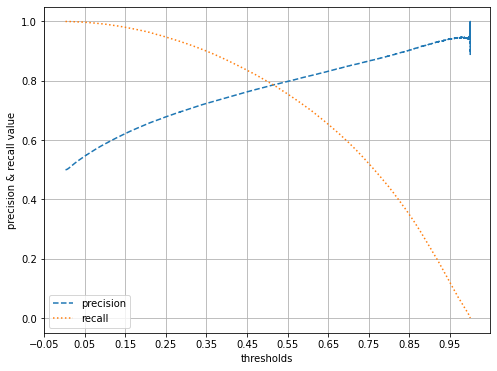

In [51]:
# 임계값별로 정밀도-재현율 출력
decision_function = model.predict_proba(x_up_test)[:, 1]
precision_recall_curve_plot(y_up_test, decision_function)

In [57]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_up_test, predict_y)
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값:  [1]
샘플 임곗값별 FPR:  [0.236]
샘플 임곗값별 TPR:  [0.814]


In [60]:
from sklearn.metrics import roc_auc_score
pred_proba = model.predict_proba(x_up_test)[:, 1]
roc_score = roc_auc_score(y_up_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


ROC AUC 값: 0.8384


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


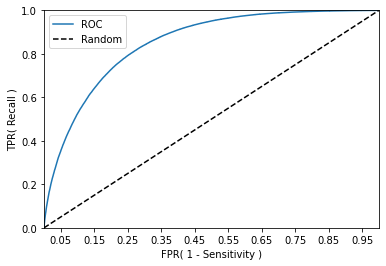

In [61]:
def roc_curve_plot(y_up_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_up_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_up_test, lr_clf.predict_proba(x_up_test)[:, 1] )

모델 합치기 위한 pkl 파일 생성

In [64]:
import joblib # joblib import

# 학습시킨 모델을 현재 경로에 knn_model.pkl 파일로 저장합니다.
joblib.dump(model,'./sgd_model.pkl')

['./sgd_model.pkl']

In [65]:
# 저장된 모델 출력

loaded_model = joblib.load('./sgd_model.pkl')

score = loaded_model.score(x_up_test,y_up_test)
print('정확도: {score:.3f}'.format(score=score))

정확도: 0.499


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


Logistic regression 값 : 0.8502

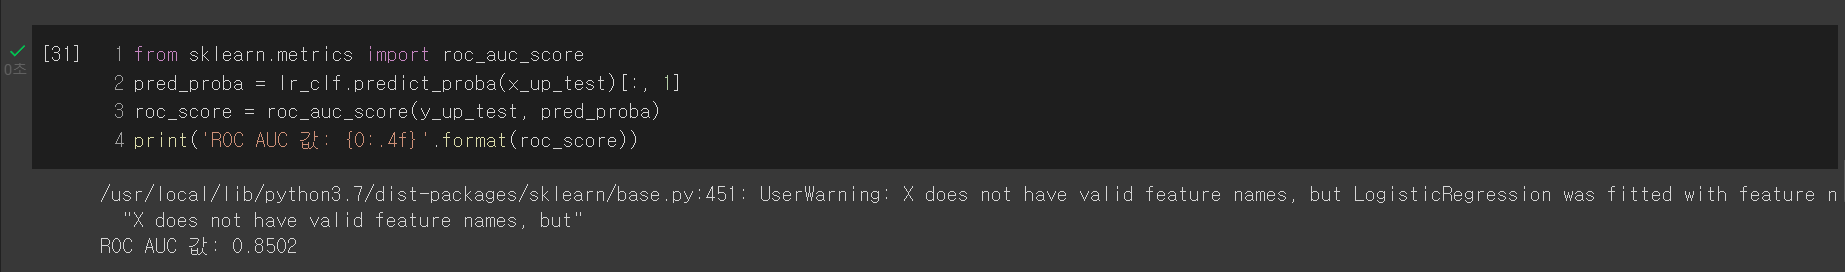

SGD 값 : 0.8384

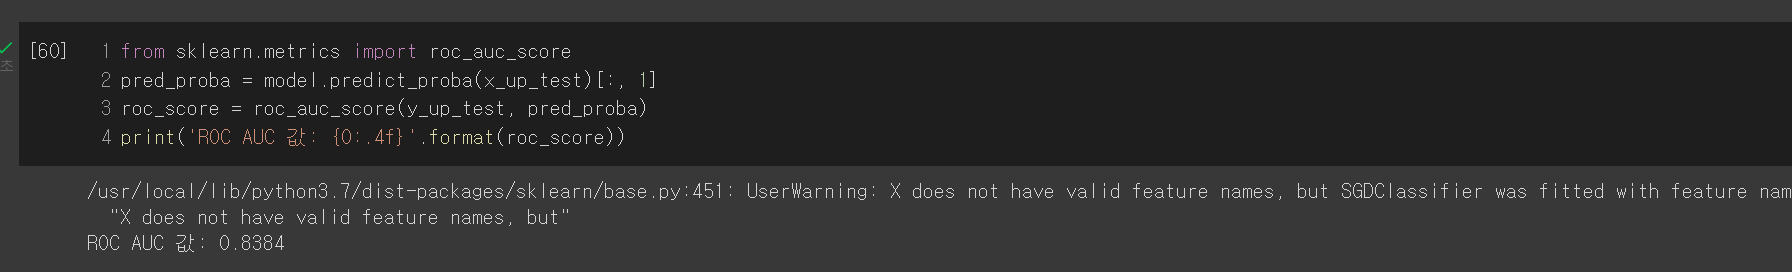

[Hyperparameter 정보들](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

[Hyperparameter 정보들2](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)

[Hyperparameter 정보들3](https://hyemin-kim.github.io/2020/07/26/S-Python-sklearn2/)

[Hyperparameter tuning baseline code](https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning/notebook)